<img src="https://images.pexels.com/photos/106399/pexels-photo-106399.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500" style='width:1000px'>

In [1]:


import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Data Loading

In [2]:
data=pd.read_csv(r'C:\Users\pankh\Desktop\Bengaluru_House_Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Data Cleaning

In [5]:
data=data.drop(['area_type','availability','balcony','society'],axis=1)
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [6]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
data.shape

(13246, 5)

In [10]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)


# Feature Engineering
**Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**

In [11]:
data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\pankh\AppData\Local\Temp/ipykernel_15916/3168625377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
data['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
data[data.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
data[~data['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
data=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_sqft_tonum)

In [20]:
data.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [21]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

# Feature Engineering
**Add new feature called price per square feet**

In [22]:
data1=data.copy()
data1['price_per_sqft']=data1['price']*1000000/data1['total_sqft']
data1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [23]:
len(data1.location.unique())

1304

In [24]:
data1.location=data1.location.apply(lambda x: x.strip())
location_stats=data1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
len(location_stats[location_stats<=10])

1052

In [26]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
len(data1.location.unique())

1293

In [28]:
data1.location=data1.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data1.location.unique())

242

In [29]:
data1.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
9,other,6 Bedroom,1020.0,6.0,370.00,6,362745.098039


In [30]:
data1[data1.total_sqft/data1.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [31]:
data2=data1[~(data1.total_sqft/data1.BHK<300)]
data2.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,38888.888889


In [32]:
data2.shape

(12502, 7)

# Outlier Removal Using Standard Deviation and Mean

In [33]:
data2["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count      12456.000000
mean       63085.028260
std        41681.273385
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: price_per_sqft, dtype: object

In [34]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3=remove_pps_outliers(data2)
data3.shape

(10241, 7)

Matplotlib is building the font cache; this may take a moment.


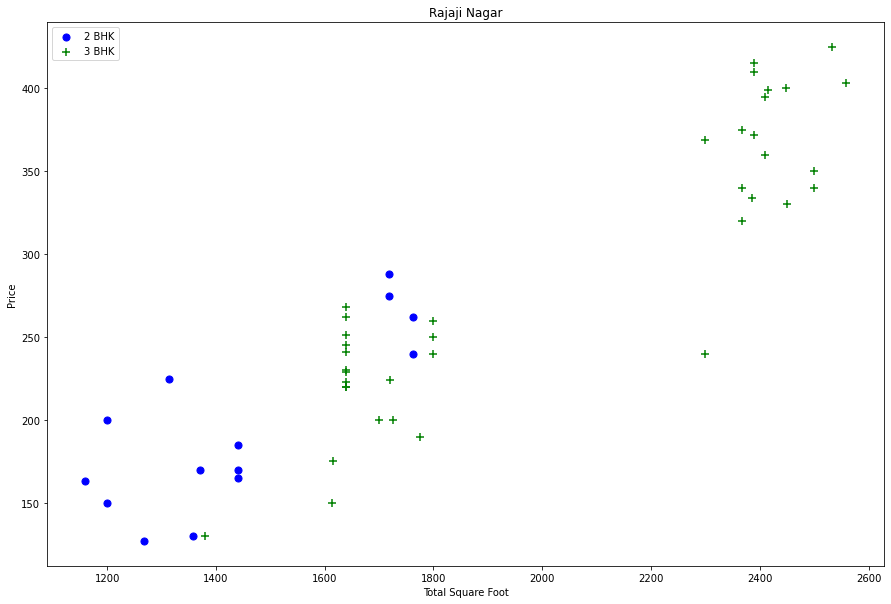

In [35]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Rajaji Nagar")

In [36]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data4=remove_bhk_outliers(data3)
data4.shape

(7329, 7)

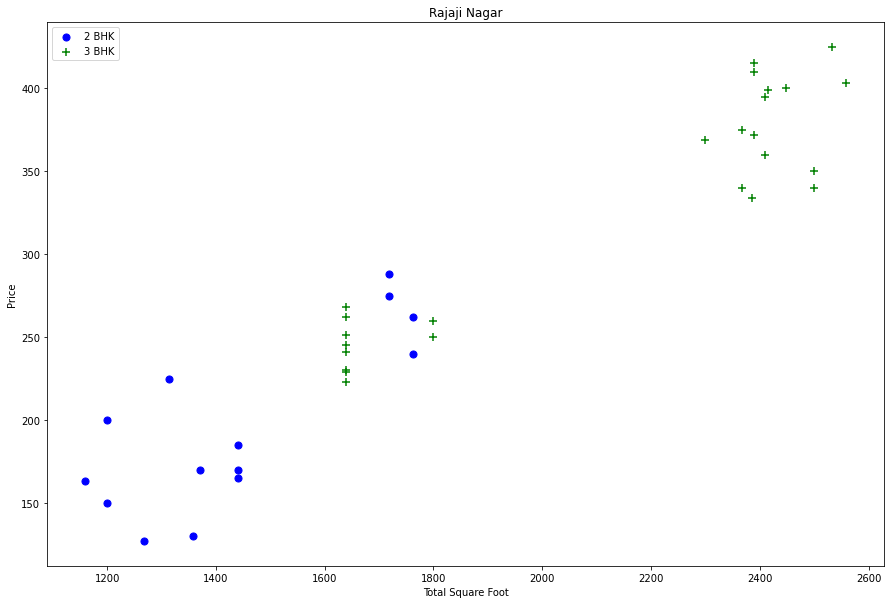

In [37]:
plot_scatter_chart(data4,"Rajaji Nagar")

Text(0, 0.5, 'Count')

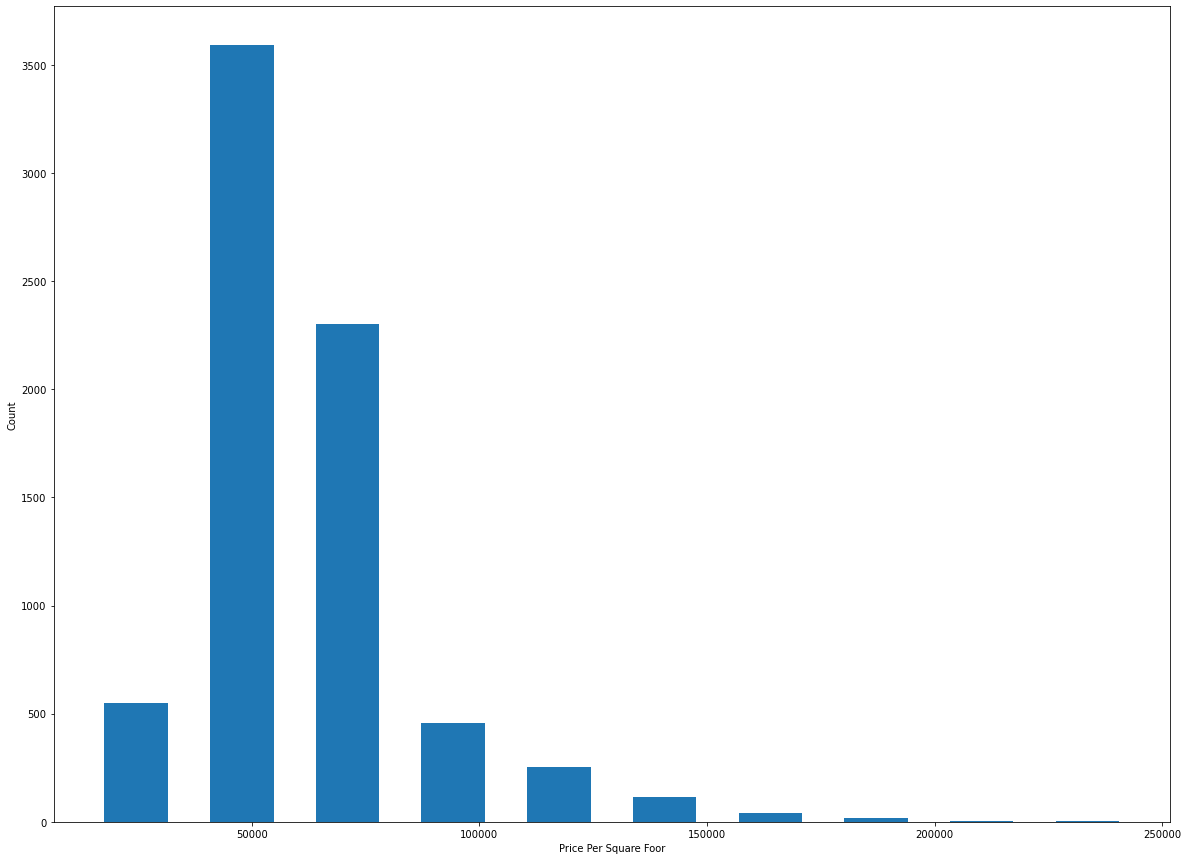

In [38]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")


# Outlier Removal Using Bathrooms Feature

In [39]:
data4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [40]:
data4[data4.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.00000
8486,other,10 BHK,12000.0,12.0,525.0,10,43750.00000
8575,other,16 BHK,10000.0,16.0,550.0,16,55000.00000
9308,other,11 BHK,6000.0,12.0,150.0,11,25000.00000
9639,other,13 BHK,5425.0,13.0,275.0,13,50691.24424


Text(0, 0.5, 'Count')

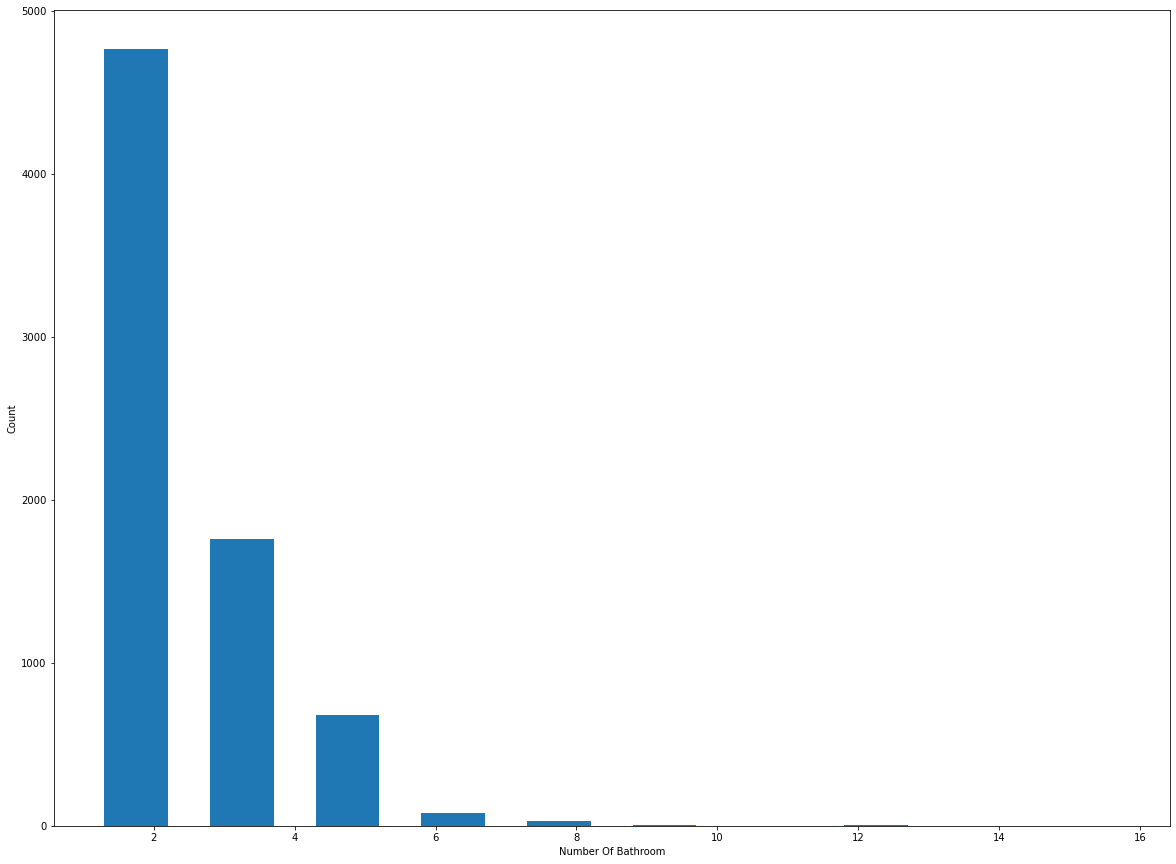

In [41]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [42]:
data4[data4.bath>data4.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300
8411,other,6 BHK,11338.0,9.0,1000.0,6,88198.976892


In [43]:
data5=data4[data4.bath<data4.BHK+2]
data5.shape

(7251, 7)

In [44]:
data6=data5.drop(['size','price_per_sqft'],axis='columns')
data6

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [45]:
dummies=pd.get_dummies(data6.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data7=pd.concat([data6,dummies.drop('other',axis='columns')],axis='columns')
data7.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data8=data7.drop('location',axis='columns')
data8.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



# Build a Model Now...

In [48]:
data8.shape

(7251, 245)

In [49]:
X=data8.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y=data8.price

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8541787104958153

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])


# Find best model using GridSearchCV


In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687449,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721731,"{'criterion': 'mse', 'splitter': 'best'}"



**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**


# Test the model for few properties

In [55]:
def price_predict(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [56]:
price_predict('1st Phase JP Nagar',1000,2,2)

85.55741889809461

In [57]:
price_predict('1st Phase JP Nagar',1000,2,3)

84.55962727714892

In [58]:
price_predict('5th Phase JP Nagar',1000,2,2)

39.55926201733787

In [59]:
price_predict('Indira Nagar',1000,2,2)

182.46853123340003